In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [88]:
def gen_s():
    s = []
    for i in range(10,990,10):
        s.append(np.arange(i,i+11,1))
    return s
s = gen_s()

In [89]:
def gen_k():
    k = []
    for i in range(100,9900,100):
        k.append(np.arange(i,i+110,10))
    return k
k = gen_k()

In [130]:
def rate(arr_s,arr_k):
    arr_r = []
    for s in range(len(arr_k)):
        for k in range(len(arr_s)):
            val_d = arr_k[s]-arr_s[k]
            val_r = round(val_d/arr_s[k],3)
            arr_r.append([arr_s[k],arr_k[s],val_r])
    for i in range(len(arr_r)):
        if arr_r[i][2] >= 3 and arr_r[i][2] <= 9.0:
            arr_r[i].append("m")
        elif arr_r[i][2] < 3:
            arr_r[i].append("l")
        elif arr_r[i][2] > 9.0:
            arr_r[i].append("g")
    return sorted(arr_r)

In [142]:
r_0_0 = rate(s[0],k[0])
x = [i[0] for i in r_0_0]
y = [i[1] for i in r_0_0]
z = [i[2] for i in r_0_0]
o = [i[3] for i in r_0_0]

<Axes: >

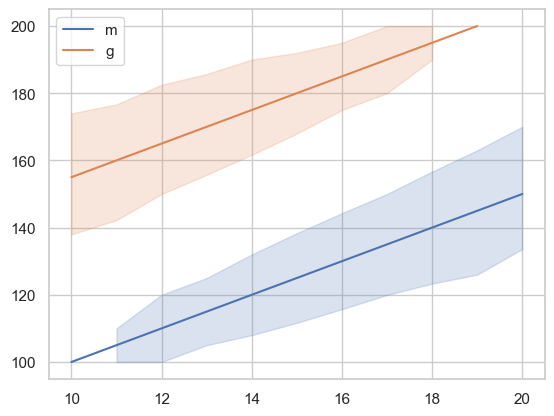

In [141]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=x, y=y,
             hue=o)